# Fine-Tuning the Parakeet RNNT (0.6B Parameters) on the Urdu Common Voice Dataset

## What is the Parakeet RNNT Model and What Is It Based On?

The **Parakeet RNNT Model** is an Automatic Speech Recognition (ASR) model that transcribes speech into **lowercase English**. It is an XL version of the FastConformer Transducer, featuring approximately 600 million parameters. This model was developed collaboratively by **NVIDIA** and **suno.ai**.

You can access the model on 🤗 [Hugging Face](https://huggingface.co/nvidia/parakeet-rnnt-0.6b).

---

## What is FastConformer?

Before exploring FastConformer, let’s first understand its foundation: the **Conformer** architecture.

### Conformer 

The **Conformer** (Convolution-augmented Transformer for Speech Recognition) architecture, introduced by **Google** in 2020, is designed to combine the strengths of two key components:
- **Self-attention mechanisms** (from Transformers): Captures long-range dependencies.
- **Convolutional layers**: Excels at modeling local and sequential information.

This hybrid approach allows the Conformer to effectively capture both global context and fine-grained details in audio sequences. As a result, it is highly efficient and accurate for ASR and related tasks.

For a detailed read, refer to the [Conformer research paper](https://arxiv.org/pdf/2005.08100).

![Conformer Architecture](/Users/hashimmuhammadnadeem/conformer-fine-tuned-urdu/assets/conformer_architecture.png "Conformer Architecture Overview")

---

### FastConformer

Building on the Conformer, **FastConformer** was introduced by **NVIDIA** in 2023 as a faster and more efficient version of the original architecture. The enhancements in FastConformer are detailed in the [FastConformer research paper](https://arxiv.org/pdf/2305.05084).

**Modifications in FastConformer**:
1. **8x Depthwise Convolutional Subsampling**:
   - Uses 256 channels for efficient feature extraction.
2. **Reduced Convolutional Kernel Size**:
   - Convolutional blocks have a kernel size of 9.
3. **Performance Gains**:
   - The FastConformer encoder is ~2.4x faster than the original Conformer without significant degradation in model quality.
   - Further speed-ups (up to 2.7x) can be achieved by reducing subsampling channels to 128, though this begins to affect model quality.

**Local Attention and Long Inference**:
- With **256 subsampling channels**, inference can handle audio >1 hour in length.
- With **128 subsampling channels**, inference is feasible for audio >2 hours.

---
You can access the **[Parakeet RNNT Model](https://huggingface.co/nvidia/parakeet-rnnt-0.6b)** on 🤗Hugging Face.


## Training Resources Used

The following data and resources were utilized to fine-tune the **Parakeet RNNT Model** on Urdu:

---

### Data

The **entire Urdu dataset** from Mozilla’s **Common Voice** was used, accessed via the 🤗 [Hugging Face Datasets Library](https://huggingface.co/datasets/mozilla-foundation/common_voice_12_0). 

---

### Hardware

The fine-tuning process was conducted on **Google Colab Pro**, using an **NVIDIA A100 GPU** for approximately **5 hours**. 


## Library Installations

To ensure smooth execution and avoid version conflicts, I recommend running the following `pip` installation commands **exactly as provided**, without any modifications.

If you are running this notebook locally, ensure your **NVCC driver version** is **16.0 or higher**.


In [1]:
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu121
!pip uninstall mamba-ssm causal-conv1d

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.1/799.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install causal-conv1d && pip install mamba-ssm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 7.5 MB/s eta 0:00:00
  Created wheel for causal-conv1d: filename=causal_conv1d-1.4.0-cp310-cp310-linux_x86_64.whl size=104867883 sha256=b5e7cf7e964b5e99275d97ba1e1b0ee4e3073f4593743ba1f1c6aa394a3008cc
  Stored in directory: /root/.cache/pip/wheels/e3/dd/4c/205f24e151736bd22f5980738dd10a19af6f093b6f4dcab006
Successfully built causal-conv1d
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mamba-ssm: filename=mamba_ssm-2.2.2-cp310-cp310-linux_x86_64.whl size=323988104 sha256=6b082468a6abb6f6bc50c99263f17c6c7f5a2e8f6b275ed7998b81fb25279229
  Stored in directory: /root/.cache/pip/wheels/57/7c/90/9f963468ecc3791e36e388f9e7b4a4e1e3f90fbb340055aa4d
Successfully built mamba-ssm


In [3]:
!pip install wget
!apt-get install sox libsndfile1 ffmpeg libsox-fmt-mp3
!pip install text-unidecode
!pip install matplotlib>=3.3.2

BRANCH = 'main'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH 

"""
You have to restart the kernel in order for the changes to take effect. The exit command below will close the kernel.
"""
exit()

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c6384042f546f5998899b159fff390479a59109b4c4dae7e326de0611fb02462
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsndfile1 is already the newest version (1.0.31-2ubuntu0.1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base libsox3
  libwavpack1
Suggested packages:
  libsox-fmt-all
The following NEW packages will be installed:
  libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base
  libsox-fmt-mp3 libsox3 libwavpack1 sox
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 72

In [8]:
!pip install -U datasets

In [1]:
import os
import glob
import subprocess
import tarfile
import wget
import copy
from omegaconf import OmegaConf, open_dict
import gc
import soundfile as sf
import librosa
import tqdm
import json
from datasets import Audio
from dataclasses import dataclass
from typing import Optional
import nemo
import nemo.collections.asr as nemo_asr
from nemo.collections.asr.metrics.wer import word_error_rate
from nemo.utils import logging, exp_manager
import torch
import lightning.pytorch as ptl
import torch.nn as nn
from collections import defaultdict
from tqdm.auto import tqdm
from nemo.collections.asr.parts.utils.manifest_utils import read_manifest, write_manifest
import matplotlib.pyplot as plt

In [3]:
data_dir = 'datasets/'

if not os.path.exists(data_dir):
  os.makedirs(data_dir, exist_ok=True)

if not os.path.exists("scripts"):
  os.makedirs("scripts")

In [4]:
from huggingface_hub import login
login()

In [5]:
LANGUAGE = "ur"
VERSION = "mozilla-foundation/common_voice_12_0"

In [6]:
tokenizer_dir = os.path.join('tokenizers', LANGUAGE)
manifest_dir = os.path.join('datasets', LANGUAGE, VERSION, LANGUAGE)

In [9]:
from datasets import load_dataset

ds = load_dataset("mozilla-foundation/common_voice_12_0", "ur")

README.md:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

common_voice_12_0.py:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.57k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/63.2k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_12_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_12_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

ur_train_0.tar:   0%|          | 0.00/111M [00:00<?, ?B/s]

ur_dev_0.tar:   0%|          | 0.00/84.8M [00:00<?, ?B/s]

ur_test_0.tar:   0%|          | 0.00/85.0M [00:00<?, ?B/s]

ur_other_0.tar:   0%|          | 0.00/993M [00:00<?, ?B/s]

ur_other_1.tar:   0%|          | 0.00/875M [00:00<?, ?B/s]

ur_other_2.tar:   0%|          | 0.00/138M [00:00<?, ?B/s]

ur_invalidated_0.tar:   0%|          | 0.00/92.5M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/816k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/799k [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/21.1M [00:00<?, ?B/s]

invalidated.tsv:   0%|          | 0.00/851k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4130it [00:00, 113907.45it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3303it [00:00, 144148.11it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3301it [00:00, 135807.09it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 11828it [00:00, 118272.50it/s]
Reading metadata...: 23656it [00:00, 117538.17it/s]
Reading metadata...: 37661it [00:00, 127776.65it/s]
Reading metadata...: 50993it [00:00, 129957.87it/s]
Reading metadata...: 64379it [00:00, 131360.44it/s]
Reading metadata...: 85329it [00:00, 128862.60it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3304it [00:00, 139959.81it/s]


In [10]:
ds

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 4130
    })
    validation: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 3303
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 3301
    })
    other: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 85329
    })
    invalidated: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 3304
    })
})

## Data Preprocessing 
Data preprocessing is arguably the most crucial step in fine-tuning a model. It demands a moderate level of expertise in the language, which, for me personally, was a challenging aspect.

In [11]:
@dataclass
class HFDatasetConversionConfig:
    output_dir: str  

    sampling_rate: int = 16000
    streaming: bool = False  
    num_proc: int = -1 
    ensure_ascii: bool = True 

    resolved_output_dir: str = ''
    split_output_dir: Optional[str] = None
    split: Optional[str] = None  

def prepare_output_dirs(cfg):
    output_dir = os.path.abspath(cfg.output_dir)
    cfg.resolved_output_dir = output_dir
    cfg.split_output_dir = None

def build_map_dataset_to_nemo_func(cfg, basedir):
    def map_dataset_to_nemo(batch):
        audio_filename = os.path.basename(batch['path'])
        audio_filename = os.path.splitext(audio_filename)[0] + '.wav'
        audio_filepath = os.path.join(basedir, 'audio', audio_filename)

        audio_dir = os.path.dirname(audio_filepath)
        if not os.path.exists(audio_dir):
            os.makedirs(audio_dir, exist_ok=True)

        sf.write(audio_filepath, batch['audio']['array'], samplerate=cfg.sampling_rate)

        batch['duration'] = librosa.get_duration(y=batch['audio']['array'], sr=cfg.sampling_rate)
        batch['audio_filepath'] = audio_filepath

        del batch['audio']
        if 'file' in batch:
            del batch['file']
        if 'path' in batch:
            del batch['path']
        return batch

    return map_dataset_to_nemo

def convert_offline_dataset_to_nemo(dataset, cfg, basedir, manifest_filepath):
    num_proc = cfg.num_proc
    if num_proc < 0:
        num_proc = max(1, os.cpu_count() // 2)

    dataset = dataset.map(build_map_dataset_to_nemo_func(cfg, basedir), num_proc=num_proc)

    with open(manifest_filepath, 'w', encoding='utf-8') as manifest_f:
        for sample in tqdm.tqdm(dataset, desc=f'Processing {cfg.split} split:', total=len(dataset)):
            manifest_f.write(f"{json.dumps(sample, ensure_ascii=cfg.ensure_ascii)}\n")

def process_dataset(dataset, cfg):
    dataset = dataset.cast_column("audio", Audio(cfg.sampling_rate, mono=True))

    if 'sentence' in dataset.features:
        dataset = dataset.rename_column("sentence", "text")

    basedir = os.path.join(cfg.resolved_output_dir, cfg.split)
    if not os.path.exists(basedir):
        os.makedirs(basedir, exist_ok=True)

    manifest_filename = f"{cfg.split}_manifest.json"
    manifest_filepath = os.path.join(basedir, manifest_filename)

    convert_offline_dataset_to_nemo(dataset, cfg, basedir=basedir, manifest_filepath=manifest_filepath)

    print(f"Finished processing split '{cfg.split}'. Manifest saved to {manifest_filepath}")

cfg = HFDatasetConversionConfig(
    output_dir='datasets/ur', 
    sampling_rate=16000,
    streaming=False,
    num_proc=1,  
    ensure_ascii=False,
)

prepare_output_dirs(cfg)

for split in ds.keys():
    print(f"Processing split: {split}")
    cfg.split = split
    process_dataset(ds[split], cfg)


Processing split: train


Map:   0%|          | 0/4130 [00:00<?, ? examples/s]

Processing train split:: 100%|██████████| 4130/4130 [00:00<00:00, 8748.16it/s]

Finished processing split 'train'. Manifest saved to /content/datasets/LANGUAGE/train/train_manifest.json
Processing split: validation


Map:   0%|          | 0/3303 [00:00<?, ? examples/s]

Processing validation split:: 100%|██████████| 3303/3303 [00:00<00:00, 8834.77it/s]

Finished processing split 'validation'. Manifest saved to /content/datasets/LANGUAGE/validation/validation_manifest.json
Processing split: test


Map:   0%|          | 0/3301 [00:00<?, ? examples/s]

Processing test split:: 100%|██████████| 3301/3301 [00:00<00:00, 8787.44it/s]

Finished processing split 'test'. Manifest saved to /content/datasets/LANGUAGE/test/test_manifest.json
Processing split: other


Map:   0%|          | 0/85329 [00:00<?, ? examples/s]

Processing other split:: 100%|██████████| 85329/85329 [00:09<00:00, 9063.79it/s]

Finished processing split 'other'. Manifest saved to /content/datasets/LANGUAGE/other/other_manifest.json
Processing split: invalidated


Map:   0%|          | 0/3304 [00:00<?, ? examples/s]

Processing invalidated split:: 100%|██████████| 3304/3304 [00:00<00:00, 8402.99it/s]

Finished processing split 'invalidated'. Manifest saved to /content/datasets/LANGUAGE/invalidated/invalidated_manifest.json


### Manifest Files

In NVIDIA NeMo, manifest files are structured text files used to define datasets for training, validation, and testing in NeMo models. They serve as a standardized way to describe the metadata for audio, text, or multimodal data, making it easier to manage and preprocess large datasets in NeMo pipelines.

In [12]:
train_manifest = f"/content/datasets/LANGUAGE/train/train_manifest.json"
dev_manifest = f"/content/datasets/LANGUAGE/validation/validation_manifest.json"
test_manifest = f"/content/datasets/LANGUAGE/test/test_manifest.json"

In [13]:
def write_processed_manifest(data, original_path):
    original_manifest_name = os.path.basename(original_path)
    new_manifest_name = original_manifest_name.replace(".json", "_processed.json")

    manifest_dir = os.path.split(original_path)[0]
    filepath = os.path.join(manifest_dir, new_manifest_name)
    write_manifest(filepath, data)
    print(f"Finished writing manifest: {filepath}")
    return filepath

In [14]:
train_manifest_data = read_manifest(train_manifest)
dev_manifest_data = read_manifest(dev_manifest)
test_manifest_data = read_manifest(test_manifest)

In [15]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [16]:
train_text = [data['text'] for data in train_manifest_data]
dev_text = [data['text'] for data in dev_manifest_data]
test_text = [data['text'] for data in test_manifest_data]

In [17]:
def get_charset(manifest_data):
    charset = defaultdict(int)
    for row in tqdm(manifest_data, desc="Computing character set"):
        text = row['text']
        for character in text:
            charset[character] += 1
    return charset

In [18]:
train_charset = get_charset(train_manifest_data)
dev_charset = get_charset(dev_manifest_data)
test_charset = get_charset(test_manifest_data)

Computing character set:   0%|          | 0/4130 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/3303 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/3301 [00:00<?, ?it/s]

In [19]:
train_dev_set = set.union(set(train_charset.keys()), set(dev_charset.keys()))
test_set = set(test_charset.keys())

In [20]:
print(f"Number of tokens in train+dev set : {len(train_dev_set)}")
print(f"Number of tokens in test set : {len(test_set)}")

Number of tokens in train+dev set : 91
Number of tokens in test set : 74


In [21]:
train_test_common = set.intersection(train_dev_set, test_set)
test_oov = test_set - train_test_common
print(f"Number of OOV tokens in test set : {len(test_oov)}")
print()
print(test_oov)

Number of OOV tokens in test set : 2

{'ى', 'ؑ'}


In [22]:
train_counts = defaultdict(list)
for token, count in train_charset.items():
    train_counts[count].append(token)
for token, count in dev_charset.items():
    train_counts[count].append(token)

count_keys = sorted(list(train_counts.keys()))

In [23]:
MAX_COUNT = 32

TOKEN_COUNT_X = []
NUM_TOKENS_Y = []
for count in range(1, MAX_COUNT + 1):
    if count in train_counts:
        num_tokens = len(train_counts[count])

        TOKEN_COUNT_X.append(count)
        NUM_TOKENS_Y.append(num_tokens)

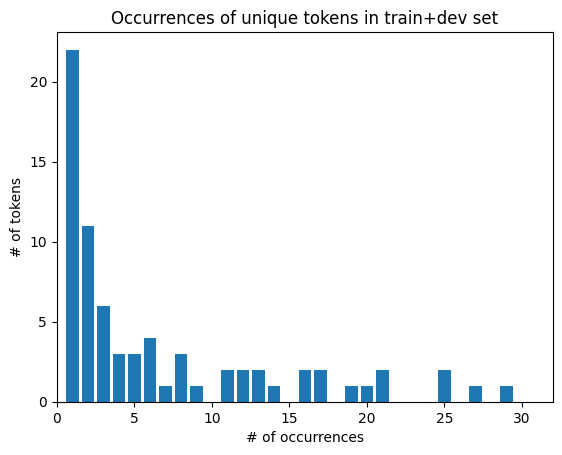

In [24]:
plt.bar(x=TOKEN_COUNT_X, height=NUM_TOKENS_Y)
plt.title("Occurrences of unique tokens in train+dev set")
plt.xlabel("# of occurrences")
plt.ylabel("# of tokens")
plt.xlim(0, MAX_COUNT)

In [25]:
UNCOMMON_TOKENS_COUNT = 5

chars_with_infrequent_occurrence = set()
for count in range(1, UNCOMMON_TOKENS_COUNT + 1):
    if count in train_counts:
        token_list = train_counts[count]
        chars_with_infrequent_occurrence.update(set(token_list))

print(f"Number of tokens with <= {UNCOMMON_TOKENS_COUNT} occurrences : {len(chars_with_infrequent_occurrence)}")

Number of tokens with <= 5 occurrences : 33


In [26]:
all_tokens = set.union(train_dev_set, test_set)
print(f"Original train+dev+test vocab size : {len(all_tokens)}")

extra_kanji = set(test_oov)
train_token_set = all_tokens - extra_kanji
print(f"New train vocab size : {len(train_token_set)}")

Original train+dev+test vocab size : 93
New train vocab size : 91


## Removing OOV Tokens. 

OOV tokens represent words that are not included in the model's vocabulary. When these tokens are present in the training data, they can lead to misrecognition, where the model incorrectly identifies OOV words as in-vocabulary (IV) words. This misclassification can degrade the overall accuracy of the ASR system, particularly affecting the recognition of surrounding IV words due to contextual confusio

Reference: [Learning Out-of-Vocabulary Words in Automatic Speech Recognition](https://www.lti.cs.cmu.edu/people/alumni/alumni-thesis/qin-long-thesis.pdf)

In [27]:
import re
import unicodedata

chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\“\%\‘\”\�\…\{\}\【\】\・\。\『\』\、\ー\〜]'  


def remove_special_characters(data):
    data["text"] = re.sub(chars_to_ignore_regex, '', data["text"]).strip()
    return data

def add_required_keys(data):
    data['pnc'] = 'no' 
    data['source_lang'] = 'ur' 
    data['task'] = 'asr'
    data['target_lang'] = 'ur'  
    return data

In [28]:
def apply_preprocessors(manifest, preprocessors):
    for processor in preprocessors:
        for idx in tqdm(range(len(manifest)), desc=f"Applying {processor.__name__}"):
            manifest[idx] = processor(manifest[idx])

    print("Finished processing manifest !")
    return manifest

In [29]:
PREPROCESSORS = [
    remove_special_characters,
    add_required_keys,
]
# Additional Preprocessing is done in create_vocab_file.py

In [30]:
train_data = read_manifest(train_manifest)
dev_data = read_manifest(dev_manifest)
test_data = read_manifest(test_manifest)

train_data_processed = apply_preprocessors(train_data, PREPROCESSORS)
dev_data_processed = apply_preprocessors(dev_data, PREPROCESSORS)
test_data_processed = apply_preprocessors(test_data, PREPROCESSORS)

train_manifest_cleaned = write_processed_manifest(train_data_processed, train_manifest)
dev_manifest_cleaned = write_processed_manifest(dev_data_processed, dev_manifest)
test_manifest_cleaned = write_processed_manifest(test_data_processed, test_manifest)


Applying remove_special_characters:   0%|          | 0/4130 [00:00<?, ?it/s]

Applying add_required_keys:   0%|          | 0/4130 [00:00<?, ?it/s]

Finished processing manifest !


Applying remove_special_characters:   0%|          | 0/3303 [00:00<?, ?it/s]

Applying add_required_keys:   0%|          | 0/3303 [00:00<?, ?it/s]

Finished processing manifest !


Applying remove_special_characters:   0%|          | 0/3301 [00:00<?, ?it/s]

Applying add_required_keys:   0%|          | 0/3301 [00:00<?, ?it/s]

Finished processing manifest !
Finished writing manifest: /content/datasets/LANGUAGE/train/train_manifest_processed.json
Finished writing manifest: /content/datasets/LANGUAGE/validation/validation_manifest_processed.json
Finished writing manifest: /content/datasets/LANGUAGE/test/test_manifest_processed.json


In [31]:
train_manifest_data = read_manifest(train_manifest_cleaned)
train_charset = get_charset(train_manifest_data)

dev_manifest_data = read_manifest(dev_manifest_cleaned)
dev_charset = get_charset(dev_manifest_data)

train_dev_set = set.union(set(train_charset.keys()), set(dev_charset.keys()))

Computing character set:   0%|          | 0/4130 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/3303 [00:00<?, ?it/s]

In [32]:
print(f"Number of tokens in preprocessed train+dev set : {len(train_dev_set)}")

Number of tokens in preprocessed train+dev set : 81


In [33]:
train_dev_list = list(train_dev_set)

output_file_path = "/content/train_dev_set.json"

with open(output_file_path, "w", encoding='utf-8') as json_file:
    json.dump(train_dev_list, json_file, ensure_ascii=False, indent=2)

print(f"train_dev_set saved to {output_file_path}")


train_dev_set saved to /content/train_dev_set.json


In [34]:
!python create_vocab_file.py --train_dev_set train_dev_set.json --output_vocab train_dev_set.txt

Vocabulary successfully written to train_dev_set.txt


In [35]:
VOCAB_SIZE = len(train_dev_set) + 2

In [36]:
TOKENIZER_TYPE = "bpe" 

In [37]:
if not os.path.exists("scripts/process_asr_text_tokenizer.py"):
  !wget -P scripts/ https://raw.githubusercontent.com/NVIDIA/NeMo/main/scripts/tokenizers/process_asr_text_tokenizer.py


--2024-11-28 10:44:24--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/scripts/tokenizers/process_asr_text_tokenizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17146 (17K) [text/plain]
Saving to: ‘scripts/process_asr_text_tokenizer.py’

process_asr_text_to 100%[===================>]  16.74K  --.-KB/s    in 0.001s  

2024-11-28 10:44:24 (23.7 MB/s) - ‘scripts/process_asr_text_tokenizer.py’ saved [17146/17146]



In [38]:
VOCAB_SIZE = len(train_dev_set) + 2

In [39]:
!python scripts/process_asr_text_tokenizer.py \
  --manifest=$train_manifest_cleaned,$dev_manifest_cleaned \
  --vocab_size=$VOCAB_SIZE \
  --data_root=$tokenizer_dir \
  --tokenizer="spe" \
  --spe_type=$TOKENIZER_TYPE \
  --spe_character_coverage=1.0 \
  --no_lower_case \
  --log

INFO:root:Finished extracting manifest : /content/datasets/LANGUAGE/train/train_manifest_processed.json
INFO:root:Finished extracting manifest : /content/datasets/LANGUAGE/validation/validation_manifest_processed.json
INFO:root:Finished extracting all manifests ! Number of sentences : 7433
[NeMo I 2024-11-28 10:44:34 sentencepiece_tokenizer:386] Processing tokenizers/ur/text_corpus/document.txt and store at tokenizers/ur/tokenizer_spe_bpe_v83
sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=tokenizers/ur/text_corpus/document.txt --model_prefix=tokenizers/ur/tokenizer_spe_bpe_v83/tokenizer --vocab_size=83 --shuffle_input_sentence=true --hard_vocab_limit=false --model_type=bpe --character_coverage=1.0 --bos_id=-1 --eos_id=-1 --remove_extra_whitespaces=false
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: tokenizers/ur/text_corpus/document.txt
  input_format: 
  model_prefix: tokenizers/ur/tokenizer_spe_bpe_v83/tokenizer
  model_type:

In [40]:
TOKENIZER_DIR = f"{tokenizer_dir}/tokenizer_spe_{TOKENIZER_TYPE}_v{VOCAB_SIZE}/"
print("Tokenizer directory :", TOKENIZER_DIR)

Tokenizer directory : tokenizers/ur/tokenizer_spe_bpe_v83/


In [41]:
# Number of tokens in tokenizer -
with open(os.path.join(TOKENIZER_DIR, 'tokenizer.vocab')) as f:
  tokens = f.readlines()

num_tokens = len(tokens)
print("Number of tokens : ", num_tokens)

Number of tokens :  83


In [42]:
if num_tokens < VOCAB_SIZE:
    print(
        f"The text in this dataset is too small to construct a tokenizer "
        f"with vocab size = {VOCAB_SIZE}. Current number of tokens = {num_tokens}. "
        f"Please reconstruct the tokenizer with fewer tokens"
    )

In [43]:
model = nemo_asr.models.EncDecCTCModelBPE.from_pretrained(model_name="nvidia/parakeet-ctc-0.6b")

parakeet-ctc-0.6b.nemo:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

[NeMo I 2024-11-28 10:45:53 mixins:176] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2024-11-28 10:45:53 modelPT:176] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /disk1/NVIDIA/datasets/LibriSpeech_NeMo/librivox-train-all.json
    sample_rate: 16000
    batch_size: 16
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 16.7
    min_duration: 0.1
    is_tarred: false
    tarred_audio_filepaths: null
    shuffle_n: 2048
    bucketing_strategy: fully_randomized
    bucketing_batch_size: null
    
[NeMo W 2024-11-28 10:45:53 modelPT:183] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: /disk1/NVIDIA/datasets/LibriSpee

[NeMo I 2024-11-28 10:45:53 features:305] PADDING: 0
[NeMo I 2024-11-28 10:46:01 save_restore_connector:275] Model EncDecCTCModelBPE was successfully restored from /root/.cache/huggingface/hub/models--nvidia--parakeet-ctc-0.6b/snapshots/16ca39445465932bfbaeb5126933d5ce8bd43a77/parakeet-ctc-0.6b.nemo.


## Preserving decoder initialization for sub-word models

Subword tokenization has an interesting phenomenon. In many languages, the base character set is small enough that many sub-words can be computed to produce a finite-sized tokenizer vocabulary (the model above has a vocabulary size of 1024 Byte Pair subwords). When preparing the tokenizer on a fine-tuning corpus, it might be possible to once again prepare a tokenizer with exactly the same number of tokens (say 1024).

In such a case, the weight matrices of the decoder match exactly, and therefore the pre-trained weights of the original model can be loaded onto the new model! This is treated as a good initialization only since further gradient updates will update significantly change the alignments of the decoder. However, we find that such an initialization sometimes significantly improves word error rate and slightly improved convergence speed.

In [44]:
pretrained_decoder = model.decoder.state_dict()

In [45]:
model.change_vocabulary(new_tokenizer_dir=TOKENIZER_DIR, new_tokenizer_type="bpe")

[NeMo W 2024-11-28 10:46:07 modelPT:281] You tried to register an artifact under config key=tokenizer.model_path but an artifact for it has already been registered.
[NeMo W 2024-11-28 10:46:07 modelPT:281] You tried to register an artifact under config key=tokenizer.vocab_path but an artifact for it has already been registered.
[NeMo W 2024-11-28 10:46:07 modelPT:281] You tried to register an artifact under config key=tokenizer.spe_tokenizer_vocab but an artifact for it has already been registered.


[NeMo I 2024-11-28 10:46:07 mixins:176] Tokenizer SentencePieceTokenizer initialized with 83 tokens
[NeMo I 2024-11-28 10:46:07 ctc_bpe_models:275] 
    Replacing old number of classes (1024) with new number of classes - 83
[NeMo I 2024-11-28 10:46:07 ctc_bpe_models:317] Changed tokenizer to ['<unk>', '▁ک', '▁ا', '▁ہ', '▁م', 'یں', '▁ب', '▁س', '▁ت', '▁پ', '▁ن', '▁کی', '▁ہے', 'ان', '▁', 'ا', 'ی', 'ک', 'ر', 'ہ', 'و', 'ن', 'ے', 'م', 'ت', 'س', 'ل', 'ب', 'ں', 'د', 'ھ', 'پ', 'ج', 'گ', '۔', 'ئ', 'ف', 'ع', 'ش', 'ق', 'ٹ', 'ز', 'ح', 'چ', 'خ', 'آ', 'ص', 'ڈ', 'ط', 'ڑ', 'ض', 'ظ', 'غ', '؟', 'ذ', 'ث', '،', 'ِ', 'ؤ', 'ُ', 'ء', "'", 'ٰ', 'َ', 'ي', 'ۂ', 'ّ', 'ه', 'ٔ', 'ژ', '’', 'ۓ', 'ؔ', 'أ', 'ك', 'ً', 'ى', 'ْ', 'ؓ', '؛', 'ۃ', '`', 'ٗ'] vocabulary.


## Restore decoder weights 

As mentioned above, if the new vocabulary size matches the old vocabulary size, it is possible to restore the decoder weights in addition to the encoder weights.

However, since English and Urdu are likely to have different vocabulary sizes, this approach will not be feasible.

In [46]:
if model.decoder.decoder_layers[0].weight.shape == pretrained_decoder['decoder_layers.0.weight'].shape:
    model.decoder.load_state_dict(pretrained_decoder)
    logging.info("Decoder shapes matched - restored weights from pre-trained model")
else:
    logging.info("\nDecoder shapes did not match - could not restore decoder weights from pre-trained model.")

[NeMo I 2024-11-28 10:46:09 <ipython-input-46-c429a989fdae>:6] 
    Decoder shapes did not match - could not restore decoder weights from pre-trained model.


In [53]:
def enable_bn_se(m):
    if type(m) == nn.BatchNorm1d:
        m.train()
        for param in m.parameters():
            param.requires_grad_(True)

    if 'SqueezeExcite' in type(m).__name__:
        m.train()
        for param in m.parameters():
            param.requires_grad_(True)

## Freezing the encoder 

The encoder typically contains learned representations from a larger, multilingual dataset. By freezing it, you retain this valuable knowledge, which can be crucial for understanding phonetic and linguistic features that may be shared across languages.

### References:
- [Multistage Fine-tuning Strategies for Automatic Speech Recognition in Low-resource Languages](https://arxiv.org/abs/2411.04573)
- [Fine-Tuning ASR models for Very Low-Resource Languages: A Study on Mvskoke](https://aclanthology.org/2024.acl-srw.16/)

In [54]:
freeze_encoder = True
freeze_encoder = bool(freeze_encoder)

In [55]:
if freeze_encoder:
  model.encoder.freeze()
  model.encoder.apply(enable_bn_se)
  logging.info("Model encoder has been frozen")
else:
  model.encoder.unfreeze()
  logging.info("Model encoder has been un-frozen")

[NeMo I 2024-11-28 10:48:06 <ipython-input-55-3ac5995d0d8c>:4] Model encoder has been frozen


In [56]:
cfg = copy.deepcopy(model.cfg)

## Update config

Each NeMo model has a config embedded in it, which can be accessed via `model.cfg`. In general, this is the config that was used to construct the model.

For pre-trained models, this config generally represents the config used to construct the model when it was trained. A nice benefit to this embedded config is that we can repurpose it to set up new data loaders, optimizers, schedulers, and even data augmentation!

In [57]:
cfg.tokenizer.dir = TOKENIZER_DIR
cfg.tokenizer.type = "bpe"

model.cfg.tokenizer = cfg.tokenizer

In [58]:
print(OmegaConf.to_yaml(cfg.train_ds))

manifest_filepath: /disk1/NVIDIA/datasets/LibriSpeech_NeMo/librivox-train-all.json
sample_rate: 16000
batch_size: 16
shuffle: true
num_workers: 8
pin_memory: true
use_start_end_token: false
trim_silence: false
max_duration: 16.7
min_duration: 0.1
is_tarred: false
tarred_audio_filepaths: null
shuffle_n: 2048
bucketing_strategy: fully_randomized
bucketing_batch_size: null



### Setting up optimizer and scheduler

When fine-tuning character models, it is generally advised to use a lower learning rate and reduced warmup. A reduced learning rate helps preserve the pre-trained weights of the encoder. Since the fine-tuning dataset is generally smaller than the original training dataset, the warmup steps would be far too much for the smaller fine-tuning dataset.

-----
When freezing the encoder, it is possible to use the original learning rate as the model was trained on. The original learning rate can be used because the encoder is frozen, so the learning rate is used only to optimize the decoder. However, a very high learning rate would still destabilize training, even with a frozen encoder.

In [59]:
with open_dict(cfg):
  cfg.train_ds.manifest_filepath = f"{train_manifest_cleaned},{dev_manifest_cleaned}"
  cfg.train_ds.batch_size = 16
  cfg.train_ds.num_workers = 8
  cfg.train_ds.pin_memory = True
  cfg.train_ds.use_start_end_token = True
  cfg.train_ds.trim_silence = True

  cfg.validation_ds.manifest_filepath = test_manifest_cleaned
  cfg.validation_ds.batch_size = 8
  cfg.validation_ds.num_workers = 8
  cfg.validation_ds.pin_memory = True
  cfg.validation_ds.use_start_end_token = True
  cfg.validation_ds.trim_silence = True

  cfg.test_ds.manifest_filepath = test_manifest_cleaned
  cfg.test_ds.batch_size = 8
  cfg.test_ds.num_workers = 8
  cfg.test_ds.pin_memory = True
  cfg.test_ds.use_start_end_token = True
  cfg.test_ds.trim_silence = True

In [60]:
model.setup_training_data(cfg.train_ds)
model.setup_multiple_validation_data(cfg.validation_ds)
model.setup_multiple_test_data(cfg.test_ds)

[NeMo I 2024-11-28 10:48:20 collections:197] Dataset loaded with 7433 files totalling 8.78 hours
[NeMo I 2024-11-28 10:48:20 collections:198] 0 files were filtered totalling 0.00 hours
[NeMo I 2024-11-28 10:48:20 collections:197] Dataset loaded with 3301 files totalling 3.81 hours
[NeMo I 2024-11-28 10:48:20 collections:198] 0 files were filtered totalling 0.00 hours
[NeMo I 2024-11-28 10:48:20 collections:197] Dataset loaded with 3301 files totalling 3.81 hours
[NeMo I 2024-11-28 10:48:20 collections:198] 0 files were filtered totalling 0.00 hours


### Examine dataset outliers

In general, there are minor differences between the Character encoding and Sub-word encoding models. Since sub-words can encode larger sequence of tokens into a single subword, they substantially reduce the target sequence length.

CTC loss works under the assumption that $T$ (the acoustic model's output sequence length) $> U$ (the target sequence length). If this criterion is violated, CTC loss is practically set to $\infty$ (which is then forced to $0$ by PyTorch's `zero_infinity` flag), and its gradient is set to 0.

Therefore it is essential to inspect the ratio of $\frac{T}{U}$ and ensure that it's reasonably close to 1 or higher.

In [61]:
def analyse_ctc_failures_in_model(model):
    count_ctc_failures = 0
    am_seq_lengths = []
    target_seq_lengths = []

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model = model.to(device)
    mode = model.training

    train_dl = model.train_dataloader()

    with torch.no_grad():
      model = model.eval()
      for batch in tqdm(train_dl, desc='Checking for CTC failures'):
          x, x_len, y, y_len = batch
          x, x_len = x.to(device), x_len.to(device)
          x_logprobs, x_len, greedy_predictions = model(input_signal=x, input_signal_length=x_len)

          for xl, yl in zip(x_len, y_len):
              if xl <= yl:
                  count_ctc_failures += 1

          am_seq_lengths.extend(x_len.to('cpu').numpy().tolist())

          target_seq_lengths.extend(y_len.to('cpu').numpy().tolist())

          del x, x_len, y, y_len, x_logprobs, greedy_predictions

    if mode:
      model = model.train()

    return count_ctc_failures, am_seq_lengths, target_seq_lengths

In [62]:
results = analyse_ctc_failures_in_model(model)

Checking for CTC failures:   0%|          | 0/465 [00:00<?, ?it/s]

In [63]:
num_ctc_failures, am_seq_lengths, target_seq_lengths = results

In [6]:
if num_ctc_failures > 0:
  print(f"\nCTC loss will fail for {num_ctc_failures} samples ({num_ctc_failures * 100./ float(len(am_seq_lengths))} % of samples)\n")
else:
  print("No CTC failure cases !")

CTC loss will fail for 83 samples (1.1166420018834926 % of samples)


In [65]:
avg_T = sum(am_seq_lengths) / float(len(am_seq_lengths))
avg_U = sum(target_seq_lengths) / float(len(target_seq_lengths))

avg_length_ratio = 0
for am_len, tgt_len in zip(am_seq_lengths, target_seq_lengths):
  avg_length_ratio += (am_len / float(tgt_len))
avg_length_ratio = avg_length_ratio / len(am_seq_lengths)

print(f"Average Acoustic model sequence length = {avg_T}")
print(f"Average Target sequence length = {avg_U}")
print()
print(f"Ratio of Average AM sequence length to target sequence length = {avg_length_ratio}")

Average Acoustic model sequence length = 51.93623032422978
Average Target sequence length = 30.86681017085968

Ratio of Average AM sequence length to target sequence length = 1.8514481616010194


In [66]:
print(OmegaConf.to_yaml(cfg.optim))

name: adamw
lr: 0.001
betas:
- 0.9
- 0.98
weight_decay: 0.001
sched:
  name: CosineAnnealing
  warmup_steps: 15000
  warmup_ratio: null
  min_lr: 0.0001



In [67]:
with open_dict(model.cfg.optim):
  model.cfg.optim.lr = 0.001
  model.cfg.optim.weight_decay = 0.0001
  model.cfg.optim.sched.warmup_steps = None  
  model.cfg.optim.sched.warmup_ratio = 0.10  
  model.cfg.optim.sched.min_lr = 1e-9

## Augmentation 

For low resource languages, it might be better to increase augmentation via SpecAugment to reduce overfitting. However, this might, in turn, make it too hard for the model to train in a short number of epochs.

In [68]:
with open_dict(model.cfg.spec_augment):
  model.cfg.spec_augment.freq_masks = 2
  model.cfg.spec_augment.freq_width = 25
  model.cfg.spec_augment.time_masks = 10
  model.cfg.spec_augment.time_width = 0.05

model.spec_augmentation = model.from_config_dict(model.cfg.spec_augment)

In [69]:
use_cer = True 
log_prediction = True

In [70]:
model.wer.use_cer = use_cer
model.wer.log_prediction = log_prediction

In [72]:

if torch.cuda.is_available():
  accelerator = 'gpu'
else:
  accelerator = 'gpu'

EPOCHS = 100  # 100 epochs would provide better results

trainer = ptl.Trainer(devices=1,
                      accelerator=accelerator,
                      max_epochs=EPOCHS,
                      accumulate_grad_batches=4,
                      enable_checkpointing=False,
                      logger=False,
                      log_every_n_steps=5,
                      check_val_every_n_epoch=10)

# Setup model with the trainer
model.set_trainer(trainer)

# finally, update the model's internal config
model.cfg = model._cfg

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [73]:
from nemo.utils import exp_manager

# Environment variable generally used for multi-node multi-gpu training.
# In notebook environments, this flag is unnecessary and can cause logs of multiple training runs to overwrite each other.
os.environ.pop('NEMO_EXPM_VERSION', None)

config = exp_manager.ExpManagerConfig(
    exp_dir=f'experiments/lang-{LANGUAGE}/',
    name=f"ASR-Model-Language-{LANGUAGE}",
    checkpoint_callback_params=exp_manager.CallbackParams(
        monitor="val_wer",
        mode="min",
        always_save_nemo=True,
        save_best_model=True,
    ),
)

config = OmegaConf.structured(config)

logdir = exp_manager.exp_manager(trainer, config)

[NeMo I 2024-11-28 10:52:04 exp_manager:450] ExpManager schema
[NeMo I 2024-11-28 10:52:04 exp_manager:451] {'explicit_log_dir': None, 'exp_dir': None, 'name': None, 'version': None, 'use_datetime_version': True, 'resume_if_exists': False, 'resume_past_end': False, 'resume_ignore_no_checkpoint': False, 'resume_from_checkpoint': None, 'create_tensorboard_logger': True, 'summary_writer_kwargs': None, 'create_wandb_logger': False, 'wandb_logger_kwargs': None, 'create_mlflow_logger': False, 'mlflow_logger_kwargs': {'experiment_name': None, 'tracking_uri': None, 'tags': None, 'save_dir': './mlruns', 'prefix': '', 'artifact_location': None, 'run_id': None, 'log_model': False}, 'create_dllogger_logger': False, 'dllogger_logger_kwargs': {'verbose': False, 'stdout': False, 'json_file': './dllogger.json'}, 'create_clearml_logger': False, 'clearml_logger_kwargs': {'project': None, 'task': None, 'connect_pytorch': False, 'model_name': None, 'tags': None, 'log_model': False, 'log_cfg': False, 'log_

In [74]:
%%time
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[NeMo I 2024-11-28 10:52:54 modelPT:793] Optimizer config = AdamW (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.98]
        capturable: False
        differentiable: False
        eps: 1e-08
        foreach: None
        fused: None
        lr: 0.001
        maximize: False
        weight_decay: 0.0001
    )
[NeMo I 2024-11-28 10:52:54 lr_scheduler:948] Scheduler "<nemo.core.optim.lr_scheduler.CosineAnnealing object at 0x7c2eb38612d0>" 
    will be used during training (effective maximum steps = 11700) - 
    Parameters : 
    (warmup_steps: null
    warmup_ratio: 0.1
    min_lr: 1.0e-09
    max_steps: 11700
    )


INFO: 
  | Name              | Type                              | Params | Mode 
--------------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0      | train
1 | encoder           | ConformerEncoder                  | 607 M  | train
2 | spec_augmentation | SpectrogramAugmentation           | 0      | train
3 | wer               | WER                               | 0      | train
4 | decoder           | ConvASRDecoder                    | 86.1 K | train
5 | loss              | CTCLoss                           | 0      | train
--------------------------------------------------------------------------------
135 K     Trainable params
607 M     Non-trainable params
607 M     Total params
2,431.341 Total estimated model params size (MB)
695       Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name              | Type                              | Param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[NeMo W 2024-11-28 10:52:56 ctc_greedy_decoding:168] CTC decoding strategy 'greedy' is slower than 'greedy_batch', which implements the same exact interface. Consider changing your strategy to 'greedy_batch' for a free performance improvement.


[NeMo I 2024-11-28 10:52:56 wer:329] 
    
[NeMo I 2024-11-28 10:52:56 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 10:52:56 wer:331] predicted:ع م` م` مع معۃصۃزعذًعصع
[NeMo I 2024-11-28 10:52:56 wer:329] 
    
[NeMo I 2024-11-28 10:52:56 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 10:52:56 wer:331] predicted:صع` اص محصۃعۃصعصۃ پًۃ`ًه پ`صۃعۃ؟صۃعصۃعۃ ن` نۃصۃصۃ


Training: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 10:52:56 preemption:56] Preemption requires torch distributed to be initialized, disabling preemption
[NeMo I 2024-11-28 10:52:59 wer:329] 
    
[NeMo I 2024-11-28 10:52:59 wer:330] reference:بچے سب سے زیادہ متاثر ہوتے ہیں
[NeMo I 2024-11-28 10:52:59 wer:331] predicted:ۃشؤ مۂۃ مۃىۃشہ اص تًۃ مۃعز`صۃ مۃ م
[NeMo I 2024-11-28 10:53:01 wer:329] 
    
[NeMo I 2024-11-28 10:53:01 wer:330] reference:پن ین کی چھٹنی کی ترتیب
[NeMo I 2024-11-28 10:53:01 wer:331] predicted:صعذ` محعۃخ م ب؟ مشۃ مۃ`ۃع
[NeMo I 2024-11-28 10:53:03 wer:329] 
    
[NeMo I 2024-11-28 10:53:03 wer:330] reference:مزاج بھی شاعرانہ ہے۔
[NeMo I 2024-11-28 10:53:03 wer:331] predicted:صۃع`ۃً م اۃع`ش معذۓ` پ
[NeMo I 2024-11-28 10:53:05 wer:329] 
    
[NeMo I 2024-11-28 10:53:05 wer:330] reference:معاشی مواقع پیدا ہوں۔
[NeMo I 2024-11-28 10:53:05 wer:331] predicted:صع` نًعۃعۃصشۃصۃ ن` م`ص مص مص` مۃص
[NeMo I 2024-11-28 10:53:08 wer:329] 
    
[NeMo I 2024-11-28 10:53:08 wer:330] reference:روشنی آکر واپس نہیں جاسکت

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 11:25:45 wer:329] 
    
[NeMo I 2024-11-28 11:25:45 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 11:25:45 wer:331] predicted:یہ طناسو بید ک بھی ہے۔
[NeMo I 2024-11-28 11:25:45 wer:329] 
    
[NeMo I 2024-11-28 11:25:45 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 11:25:45 wer:331] predicted:تو اون کے خلا م کتمات کا فیصلاف کیم  نہییں ہورہا۔
[NeMo I 2024-11-28 11:25:45 wer:329] 
    
[NeMo I 2024-11-28 11:25:45 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 11:25:45 wer:331] predicted:جب جوموریت کی بات ہوتھی ہےیں۔
[NeMo I 2024-11-28 11:25:46 wer:329] 
    
[NeMo I 2024-11-28 11:25:46 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 11:25:46 wer:331] predicted:فیکن کرت ہیں۔
[NeMo I 2024-11-28 11:25:46 wer:329] 
    
[NeMo I 2024-11-28 11:25:46 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 11:25:46 wer:331] predicted:چھی  ہوکتا ہے۔
[NeMo I 2024-11-28 11:25:46 wer:329] 
    
[NeMo 

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 1170: 'val_wer' reached 0.35438 (best 0.35438), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.3544-epoch=9.ckpt' as top 3


[NeMo I 2024-11-28 11:27:06 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 11:27:16 wer:329] 
    
[NeMo I 2024-11-28 11:27:16 wer:330] reference:باسا
[NeMo I 2024-11-28 11:27:16 wer:331] predicted:مسا۔
[NeMo I 2024-11-28 11:27:18 wer:329] 
    
[NeMo I 2024-11-28 11:27:18 wer:330] reference:فتوی کس مسئلے میں ایک رائے ہے۔
[NeMo I 2024-11-28 11:27:18 wer:331] predicted:خ توی کیس س مسے میںے رائ ہے۔
[NeMo I 2024-11-28 11:27:20 wer:329] 
    
[NeMo I 2024-11-28 11:27:20 wer:330] reference:اوراپنے سے زیادہ کام کرنے لگ پڑیں۔
[NeMo I 2024-11-28 11:27:20 wer:331] predicted:ول اک می سیزادر کام کرنے لک پڑے
[NeMo I 2024-11-28 11:27:22 wer:329] 
    
[NeMo I 2024-11-28 11:27:22 wer:330] reference:اور نہ دوبارہ آئے گا۔
[NeMo I 2024-11-28 11:27:22 wer:331] predicted:پرنا د بارآائگا
[NeMo I 2024-11-28 11:27:24 wer:329] 
    
[NeMo I 2024-11-28 11:27:24 wer:330] r

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 12:00:02 wer:329] 
    
[NeMo I 2024-11-28 12:00:02 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 12:00:02 wer:331] predicted:یہی  تناسوب بیوت کاھی ہے
[NeMo I 2024-11-28 12:00:02 wer:329] 
    
[NeMo I 2024-11-28 12:00:02 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 12:00:02 wer:331] predicted:تور اون ک خلاف مقا تتمات کا فایصلب کین نہیں ہو رہا
[NeMo I 2024-11-28 12:00:03 wer:329] 
    
[NeMo I 2024-11-28 12:00:03 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 12:00:03 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 12:00:03 wer:329] 
    
[NeMo I 2024-11-28 12:00:03 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 12:00:03 wer:331] predicted:فیکن پرتےہ ہیں۔
[NeMo I 2024-11-28 12:00:03 wer:329] 
    
[NeMo I 2024-11-28 12:00:03 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 12:00:03 wer:331] predicted:کچھی  ہو سکتا ہے۔
[NeMo I 2024-11-28 12:00:03 wer:329] 
    


INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 2340: 'val_wer' reached 0.28921 (best 0.28921), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2892-epoch=19.ckpt' as top 3


[NeMo I 2024-11-28 12:01:10 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 12:01:23 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 12:01:23 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 12:01:36 wer:329] 
    
[NeMo I 2024-11-28 12:01:36 wer:330] reference:وہاں معاشرے میں ایک خلیج بہت عمیق ہے
[NeMo I 2024-11-28 12:01:36 wer:331] predicted:اہا مچر میںک حلیض بہتعمیی ہے
[NeMo I 2024-11-28 12:01:38 wer:329] 
    
[NeMo I 2024-11-28 12:01:38 wer:330] ref

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 12:34:31 wer:329] 
    
[NeMo I 2024-11-28 12:34:31 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 12:34:31 wer:331] predicted:یہی  تناسوب ب یود کھی ہے۔
[NeMo I 2024-11-28 12:34:31 wer:329] 
    
[NeMo I 2024-11-28 12:34:31 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 12:34:31 wer:331] predicted:تو اون کے خلاف مقاتمات کا فایصلہ کین نہیں ہو رہا
[NeMo I 2024-11-28 12:34:32 wer:329] 
    
[NeMo I 2024-11-28 12:34:32 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 12:34:32 wer:331] predicted:جب جوموریت کی بات ہوتی ہےیں۔
[NeMo I 2024-11-28 12:34:32 wer:329] 
    
[NeMo I 2024-11-28 12:34:32 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 12:34:32 wer:331] predicted:فیکن ترتےہ ہیں۔
[NeMo I 2024-11-28 12:34:32 wer:329] 
    
[NeMo I 2024-11-28 12:34:32 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 12:34:32 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 12:34:32 wer:329] 
   

INFO:pytorch_lightning.utilities.rank_zero:Epoch 29, global step 3510: 'val_wer' reached 0.27352 (best 0.27352), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2735-epoch=29.ckpt' as top 3


[NeMo I 2024-11-28 12:35:40 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 12:35:53 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 12:35:53 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 12:36:05 wer:329] 
    
[NeMo I 2024-11-28 12:36:05 wer:330] reference:کیا اس کے بعد دودھ اور شہد کی نہریں بہنے لگیں گی؟
[NeMo I 2024-11-28 12:36:05 wer:331] predicted:کیاز کے با دو اور شید کیحیرن پہنے رگین گی
[NeMo I 2024-11-28 12:36:08 wer:329] 
    
[NeMo I 2024-1

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 13:09:01 wer:329] 
    
[NeMo I 2024-11-28 13:09:01 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 13:09:01 wer:331] predicted:یہیں  تناسوب ب یود کھی ہے۔
[NeMo I 2024-11-28 13:09:01 wer:329] 
    
[NeMo I 2024-11-28 13:09:01 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 13:09:01 wer:331] predicted:تو اون کے خلاف مقاتمات کا فایصلب کیں نہیں ہو رہا
[NeMo I 2024-11-28 13:09:01 wer:329] 
    
[NeMo I 2024-11-28 13:09:01 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 13:09:01 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 13:09:01 wer:329] 
    
[NeMo I 2024-11-28 13:09:01 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 13:09:01 wer:331] predicted:فیکن کرتےہ ہیں۔
[NeMo I 2024-11-28 13:09:01 wer:329] 
    
[NeMo I 2024-11-28 13:09:01 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 13:09:01 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 13:09:02 wer:329] 
   

INFO:pytorch_lightning.utilities.rank_zero:Epoch 39, global step 4680: 'val_wer' reached 0.26779 (best 0.26779), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2678-epoch=39.ckpt' as top 3


[NeMo I 2024-11-28 13:10:10 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 13:10:22 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 13:10:22 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 13:10:33 wer:329] 
    
[NeMo I 2024-11-28 13:10:33 wer:330] reference:سرمئی رنگ کے گدھ پوری دنیا میں مشہور ہیں
[NeMo I 2024-11-28 13:10:33 wer:331] predicted: سور میں رنگر پوریدنیا میںشو ہیں
[NeMo I 2024-11-28 13:10:35 wer:329] 
    
[NeMo I 2024-11-28 13:10:35 wer:

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 13:43:30 wer:329] 
    
[NeMo I 2024-11-28 13:43:30 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 13:43:30 wer:331] predicted:یہی  تناسوب ب یود کھی ہے۔
[NeMo I 2024-11-28 13:43:30 wer:329] 
    
[NeMo I 2024-11-28 13:43:30 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 13:43:30 wer:331] predicted:تو اون کے خلاف مقا تتمات کا فایصلہ کیی نہیں ہو رہا
[NeMo I 2024-11-28 13:43:31 wer:329] 
    
[NeMo I 2024-11-28 13:43:31 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 13:43:31 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 13:43:31 wer:329] 
    
[NeMo I 2024-11-28 13:43:31 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 13:43:31 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 13:43:31 wer:329] 
    
[NeMo I 2024-11-28 13:43:31 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 13:43:31 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 13:43:31 wer:329] 
   

INFO:pytorch_lightning.utilities.rank_zero:Epoch 49, global step 5850: 'val_wer' reached 0.26134 (best 0.26134), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2613-epoch=49.ckpt' as top 3


[NeMo I 2024-11-28 13:44:40 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 13:44:51 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 13:44:51 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 13:45:04 wer:329] 
    
[NeMo I 2024-11-28 13:45:04 wer:330] reference:میرے آنکھوں کو سامنے ایک ندی ہے
[NeMo I 2024-11-28 13:45:04 wer:331] predicted:بیرلی ان کو کا سم نےک نہی ہے۔
[NeMo I 2024-11-28 13:45:06 wer:329] 
    
[NeMo I 2024-11-28 13:45:06 wer:330] referen

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 14:18:00 wer:329] 
    
[NeMo I 2024-11-28 14:18:00 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 14:18:00 wer:331] predicted:یہی  تناسوب ب یود کھی ہے۔
[NeMo I 2024-11-28 14:18:00 wer:329] 
    
[NeMo I 2024-11-28 14:18:00 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 14:18:00 wer:331] predicted:تور ان کے خلاف مقا تمات کا فایصلہ کیں نہیں ہو رہا
[NeMo I 2024-11-28 14:18:00 wer:329] 
    
[NeMo I 2024-11-28 14:18:00 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 14:18:00 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 14:18:00 wer:329] 
    
[NeMo I 2024-11-28 14:18:00 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 14:18:00 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 14:18:00 wer:329] 
    
[NeMo I 2024-11-28 14:18:00 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 14:18:00 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 14:18:01 wer:329] 
    

INFO:pytorch_lightning.utilities.rank_zero:Epoch 59, global step 7020: 'val_wer' reached 0.25978 (best 0.25978), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2598-epoch=59.ckpt' as top 3


[NeMo I 2024-11-28 14:19:11 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 14:19:23 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 14:19:23 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 14:19:34 wer:329] 
    
[NeMo I 2024-11-28 14:19:34 wer:330] reference:کمیل ننجیانی انجلینا جولی کے ہیرو بننے سے قبل اوبر ڈرائیور بن گئے
[NeMo I 2024-11-28 14:19:34 wer:331] predicted:کمی ننظ منزرین جوئی کے یرو ہعپنوں سے قابل عبق ک ری
[NeMo I 2024-11-28 14:19:36 wer:

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 14:52:26 wer:329] 
    
[NeMo I 2024-11-28 14:52:26 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 14:52:26 wer:331] predicted:یہی  تناسوب ب یود کھی ہے۔
[NeMo I 2024-11-28 14:52:26 wer:329] 
    
[NeMo I 2024-11-28 14:52:26 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 14:52:26 wer:331] predicted:تور ان کے خلاف مقاتمات کا فیصلہ کی نہیں ہو رہا
[NeMo I 2024-11-28 14:52:26 wer:329] 
    
[NeMo I 2024-11-28 14:52:26 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 14:52:26 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 14:52:26 wer:329] 
    
[NeMo I 2024-11-28 14:52:26 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 14:52:26 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 14:52:26 wer:329] 
    
[NeMo I 2024-11-28 14:52:26 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 14:52:26 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 14:52:27 wer:329] 
    
[N

INFO:pytorch_lightning.utilities.rank_zero:Epoch 69, global step 8190: 'val_wer' reached 0.25671 (best 0.25671), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2567-epoch=69.ckpt' as top 3


[NeMo I 2024-11-28 14:53:40 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 14:53:52 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 14:53:52 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 14:54:03 wer:329] 
    
[NeMo I 2024-11-28 14:54:03 wer:330] reference:کیا مجھے یہ تبدیلی خوش دلی سے قبول کر لینی چاہیے؟
[NeMo I 2024-11-28 14:54:03 wer:331] predicted:کیا تجہ یہ بدیلی خوش اندی سے مبول کر نے نی چاہیے
[NeMo I 2024-11-28 14:54:05 wer:329] 
    
[NeMo I

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 15:27:07 wer:329] 
    
[NeMo I 2024-11-28 15:27:07 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 15:27:07 wer:331] predicted:یہی  تناسوب ب یود ک بھی ہے۔
[NeMo I 2024-11-28 15:27:08 wer:329] 
    
[NeMo I 2024-11-28 15:27:08 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 15:27:08 wer:331] predicted:تور اون کے خلاف مقا تمات کا فایصلہ کیں نہیں ہو رہا
[NeMo I 2024-11-28 15:27:08 wer:329] 
    
[NeMo I 2024-11-28 15:27:08 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 15:27:08 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 15:27:08 wer:329] 
    
[NeMo I 2024-11-28 15:27:08 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 15:27:08 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 15:27:08 wer:329] 
    
[NeMo I 2024-11-28 15:27:08 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 15:27:08 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 15:27:08 wer:329] 
 

INFO:pytorch_lightning.utilities.rank_zero:Epoch 79, global step 9360: 'val_wer' reached 0.25616 (best 0.25616), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2562-epoch=79.ckpt' as top 3


[NeMo I 2024-11-28 15:28:18 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 15:28:30 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 15:28:30 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 15:28:40 wer:329] 
    
[NeMo I 2024-11-28 15:28:40 wer:330] reference:اگر وہ سمجھتا ہے کہ نئے پاکستان میں سب اچھا ہے۔
[NeMo I 2024-11-28 15:28:40 wer:331] predicted:گ و اس مجشتہ ہے ک نئے  پاکقی ان میں سے سچچھا ہے۔
[NeMo I 2024-11-28 15:28:43 wer:329] 
    
[NeMo I 2

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 16:01:36 wer:329] 
    
[NeMo I 2024-11-28 16:01:36 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 16:01:36 wer:331] predicted:یہی  تناسوب ب یود ک بھی ہے۔
[NeMo I 2024-11-28 16:01:37 wer:329] 
    
[NeMo I 2024-11-28 16:01:37 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 16:01:37 wer:331] predicted:تور اون کے خلاف مقا تتمات کا فیصلہ کیں نہیں ہو رہا
[NeMo I 2024-11-28 16:01:37 wer:329] 
    
[NeMo I 2024-11-28 16:01:37 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 16:01:37 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 16:01:37 wer:329] 
    
[NeMo I 2024-11-28 16:01:37 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 16:01:37 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 16:01:37 wer:329] 
    
[NeMo I 2024-11-28 16:01:37 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 16:01:37 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 16:01:37 wer:329] 
 

INFO:pytorch_lightning.utilities.rank_zero:Epoch 89, global step 10530: 'val_wer' reached 0.25513 (best 0.25513), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2551-epoch=89.ckpt' as top 3


[NeMo I 2024-11-28 16:02:53 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 16:03:04 nemo_model_checkpoint:236] New best .nemo model saved to: /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo
[NeMo I 2024-11-28 16:03:04 nemo_model_checkpoint:245] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 16:03:17 wer:329] 
    
[NeMo I 2024-11-28 16:03:17 wer:330] reference:میڈیا خاموش ہونا
[NeMo I 2024-11-28 16:03:17 wer:331] predicted:میریاخمو اشماا
[NeMo I 2024-11-28 16:03:19 wer:329] 
    
[NeMo I 2024-11-28 16:03:19 wer:330] reference:اس استدعاکو کیسے جھٹلایا جا

Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 16:36:21 wer:329] 
    
[NeMo I 2024-11-28 16:36:21 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 16:36:21 wer:331] predicted:یہی  تناسوب ب یود ک بھی ہے۔
[NeMo I 2024-11-28 16:36:21 wer:329] 
    
[NeMo I 2024-11-28 16:36:21 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 16:36:21 wer:331] predicted:تور ان کے خلاف مقا تمات کا فایصلہ کیں نہیں ہو رہا
[NeMo I 2024-11-28 16:36:21 wer:329] 
    
[NeMo I 2024-11-28 16:36:21 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 16:36:21 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 16:36:21 wer:329] 
    
[NeMo I 2024-11-28 16:36:21 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 16:36:21 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 16:36:21 wer:329] 
    
[NeMo I 2024-11-28 16:36:21 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 16:36:21 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 16:36:22 wer:329] 
  

INFO:pytorch_lightning.utilities.rank_zero:Epoch 99, global step 11700: 'val_wer' reached 0.25587 (best 0.25513), saving model to '/content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2559-epoch=99.ckpt' as top 3
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2551-epoch=89.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur--val_wer=0.2551-epoch=89.ckpt


[NeMo I 2024-11-28 16:37:45 nemo_model_checkpoint:316] /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur.nemo already exists, moving existing checkpoint to /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
[NeMo I 2024-11-28 16:37:57 nemo_model_checkpoint:288] Removing old .nemo backup /content/experiments/lang-ur/ASR-Model-Language-ur/2024-11-28_10-52-04/checkpoints/ASR-Model-Language-ur-v1.nemo
CPU times: user 5h 48min 53s, sys: 6min 20s, total: 5h 55min 13s
Wall time: 5h 45min 48s


In [75]:
# prompt: calculate the WER for this model

# Assuming model and trainer are defined as in the original code
# and the model has been trained.

# Evaluate the model on the test set
from nemo.collections.asr.metrics.wer import word_error_rate

results = trainer.validate(model)

# Extract the WER from the validation results
wer = results[0]['val_wer']

print(f"WER on test set: {wer}")

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

[NeMo I 2024-11-28 16:39:05 wer:329] 
    
[NeMo I 2024-11-28 16:39:05 wer:330] reference:یہی تناسب یوتھ کا بھی ہے۔
[NeMo I 2024-11-28 16:39:05 wer:331] predicted:یہی  تناسوب ب یود ک بھی ہے۔
[NeMo I 2024-11-28 16:39:05 wer:329] 
    
[NeMo I 2024-11-28 16:39:05 wer:330] reference:تو ان کے خلاف مقدمات کا فیصلہ کیوں نہیں ہو رہا؟
[NeMo I 2024-11-28 16:39:05 wer:331] predicted:تور اون کے خلاف مقا تتمات کا فیصلہ کیں نہیں ہو رہا
[NeMo I 2024-11-28 16:39:06 wer:329] 
    
[NeMo I 2024-11-28 16:39:06 wer:330] reference:جب جمہوریت کی بات ہوتی ہے۔
[NeMo I 2024-11-28 16:39:06 wer:331] predicted:جب جوموریت کی بات ہوتی ہیں۔
[NeMo I 2024-11-28 16:39:06 wer:329] 
    
[NeMo I 2024-11-28 16:39:06 wer:330] reference:فخر کرتے ہیں
[NeMo I 2024-11-28 16:39:06 wer:331] predicted:فیکن ترتے ہیں۔
[NeMo I 2024-11-28 16:39:06 wer:329] 
    
[NeMo I 2024-11-28 16:39:06 wer:330] reference:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 16:39:06 wer:331] predicted:کچھ بھی ہو سکتا ہے۔
[NeMo I 2024-11-28 16:39:06 wer:329] 
 

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        global_step        │     10529.9990234375      │
│         val_loss          │    0.9973775744438171     │
│          val_wer          │    0.25513166189193726    │
└───────────────────────────┴───────────────────────────┘

WER on test set: 0.25513166189193726


In [78]:
from google.colab import drive
drive.mount('/content/drive')

save_path = "/content/drive/MyDrive/Model-urdu.nemo"
print(f"Model saved at path : {save_path}")

Mounted at /content/drive
Model saved at path : /content/drive/MyDrive/Model-urdu.nemo


## Results

At first glance, a Word Error Rate (WER) of **25.513%** might appear high. However, a closer inspection reveals that many transcriptions are remarkably accurate when compared to the reference:

- **Reference**: کچھ بھی ہو سکتا ہے۔  
  **Predicted**: کچھ بھی ہو سکتا ہے۔  

---

- **Reference**: اورکوئی جمہوریت کو کوس رہا ہے۔  
  **Predicted**: اور کوئ جمہوریت کو  کو س رہا ہے۔  

---

Considering that these results were achieved after just **5 hours of fine-tuning** on an **A100 GPU** (utilizing only one-quarter of its capacity), the performance is impressive.